In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import json
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split, cross_validate,StratifiedKFold
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
#from sklearn.pipeline import Pipel
import pandas as pd
import numpy as np
import ast
import string
import nltk
import matplotlib.pyplot as plt
#nltk.download('wordnet')
import seaborn as sns
from sklearn import svm
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/Bitcoin')  

Importing Data Files

In [ ]:
df_features = pd.read_csv("elliptic_txs_features.csv")
df_edgelist = pd.read_csv("elliptic_txs_edgelist.csv")
df_classes =  pd.read_csv("elliptic_txs_classes.csv")

In [ ]:
df_features=pd.DataFrame(df_features.values, columns = ["Feature {}".format(i) for i in range(df_features.shape[1])])
df_features

In [ ]:
boolean =df_features['Feature 0'].duplicated().any()
boolean

False

Data distribution across all the features

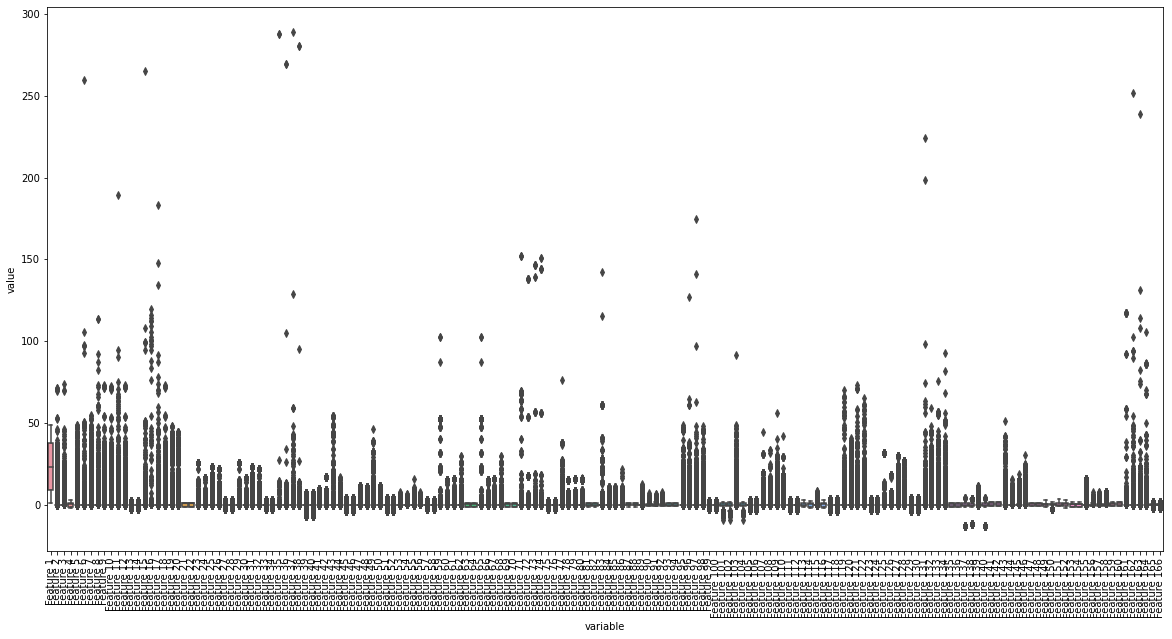

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
#df_temp=df_features.drop("label",axis=1)
df_temp=df_features.drop("Feature 0",axis=1)
plt.xticks(rotation=90)
sns.boxplot(data=pd.melt(df_temp),x="variable", y="value")
plt.savefig("aalinone")

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

Plot 10 features at a time

In [ ]:
#df_temp=df_features.drop("label",axis=1)
#df_temp=df_temp.drop("Feature 0",axis=1)
for i in range(0,166,10):
  if i!=160:
    sns.boxplot(data=pd.melt(df_temp.iloc[:,i:i+10]),x="variable", y="value")
  else:
    sns.boxplot(data=pd.melt(df_temp.iloc[:,i:i+6]),x="variable", y="value")
  plt.xticks(rotation=75)
  name="plots/"+str(i)
  #plt.savefig(name)
  plt.show()

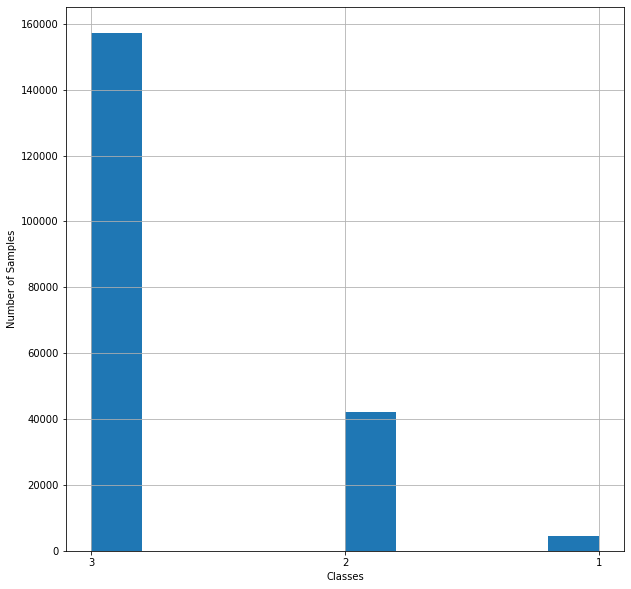

In [ ]:
df_classes =  pd.read_csv("elliptic_txs_classes.csv")
df_classes=df_classes.replace("unknown","3")
df_classes = df_classes.iloc[1:]
plt.figure(figsize=(10,10))
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
hist = df_classes['class'].hist()
plt.savefig("Class distribution2")

In [ ]:
df_features["label"]=df_classes[["class"]]

Labelling the data

In [ ]:
df_unlabelled=df_features.loc[df_features['label'] == "3"]

In [ ]:
df_labelled=df_features.loc[df_features['label'].isin(["1","2"])]

In [ ]:
df_labelled["label"].replace({"1": 1, "2": 2}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
df_labelled

,230425980,1,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,-0.16793302645225652,-0.04970696439403985,-0.16440217329951,-0.028741285856664783,-0.035390552600813516,-0.042955299258028254,-0.013281614870058885,-0.057194633660791555,-0.16960915015560768,-0.17115370708833458,-0.1744725474413385,-1.3736571773938961,-1.3714598276027399,-0.13973120192279553,-0.1489118870463073,-0.08014726965335221,-0.15566142432803598,-0.010763009512837094,-0.012107451777478418,-0.13973300164963834,-0.14890718609704007,-0.08014673584659182,-0.1556613943053229,-0.0106685610738475,-0.012005182118417812,-0.02466883065625352,-0.031272390486630317,-0.0230451563960962,-0.026214655177430907,0.001427813709709475,...,-0.12746225048300552,0.0031432964315106413,0.0024263098865888125,-0.1209504155034722,-0.19914489882884956,-0.18799267262971858,-0.21294750674116758,1.0642045463479908,1.0637874876466933,-1.3737824923785267,-1.3547347717590499,-0.29797501416794375,-1.4036981050621322,1.342003002186918,1.3407327277377104,-0.17160149344087147,-0.4581618412195745,-0.4235879631572251,-0.44088282778065335,-1.0159633735173061,-1.0162304272806977,-0.968902874660573,-0.37571453141267186,0.759748200156594,-0.7683292540299814,1.4881129012284324,1.487932476808418,-0.21681436061843226,-0.6056310578523486,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665,label
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,0.935886,-0.098695,1.203038,0.988902,0.341693,-0.013282,-0.057392,0.058329,-0.032930,-0.042709,0.065455,0.324947,-0.139732,-0.148854,-0.080105,-0.155638,1.313051,1.106965,-0.139734,-0.148850,-0.080104,-0.155638,1.313130,1.106995,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.093120,1.587690,1.586539,-0.101820,0.704558,0.448898,0.659662,0.311091,0.302198,-1.373962,-1.355393,-0.300941,-1.404583,0.064846,-0.035232,-0.168742,-0.442156,-0.416540,-0.418273,0.367605,0.392035,-0.968903,-1.943850,-1.059868,-1.678997,0.185597,0.185492,-0.169472,-0.470592,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,2
9,232344069,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,-0.049707,-0.140266,-0.028741,-0.035391,-0.042955,-0.013282,-0.006754,-0.148916,-0.151494,-0.146513,0.887058,0.884557,-0.139721,-0.148905,-0.080147,-0.155653,-0.010763,-0.012107,-0.139723,-0.148901,-0.080147,-0.155653,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.127462,0.003143,0.002426,-0.115680,-0.190199,-0.177836,-0.201578,1.064205,1.063787,-1.373932,-1.356183,-0.301411,-1.404577,-0.975738,-0.975237,-0.168742,-0.445357,-0.409015,-0.427594,-1.015963,-1.016230,-0.968903,-1.943850,-1.059868,-1.678997,0.185597,0.185492,-0.216814,-0.617907,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
10,27553029,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,-0.049707,-0.143847,-0.028741,-0.035391,-0.042955,-0.013282,-0.038424,-0.150266,-0.150457,-0.150661,0.887058,0.884557,-0.139722,-0.148906,-0.080147,-0.155654,-0.010763,-0.012107,-0.139724,-0.148902,-0.080147,-0.155654,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.127462,0.003143,0.002426,-0.107516,-0.190820,-0.180486,-0.200607,1.064205,1.063787,-1.373902,-1.348835,-0.282308,-1.400475,-0.975738,-0.975237,-0.168742,-0.454961,-0.420758,-0.436915,-1.015963,-1.016230,-0.968903,-1.943850,-1.059868,-1.678997,0.185597,0.185492,-0.216814,-0.587217,-0.539735,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
11,36411953,1,-0.172621,-0.162277,0.463609,-0.046932,-0.043875,-0.029140,-0.061584,-0.

Illicit Vs licit comparision at each timeframe

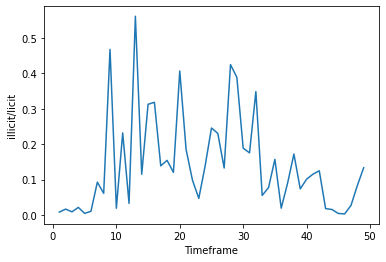

In [ ]:
x=[]
y=[]
for name,group in df_labelled.groupby(["1"]):
  ilicit = (group.label == 1).sum()
  licit = (group.label == 2).sum()
  x.append(name)
  y.append(ilicit/licit)
plt.plot(x,y)
plt.xlabel("Timeframe")
plt.ylabel("illicit/licit")
plt.savefig("ilicitvslicit")
plt.show()

Distribution of licit vS illicit at each timeframe

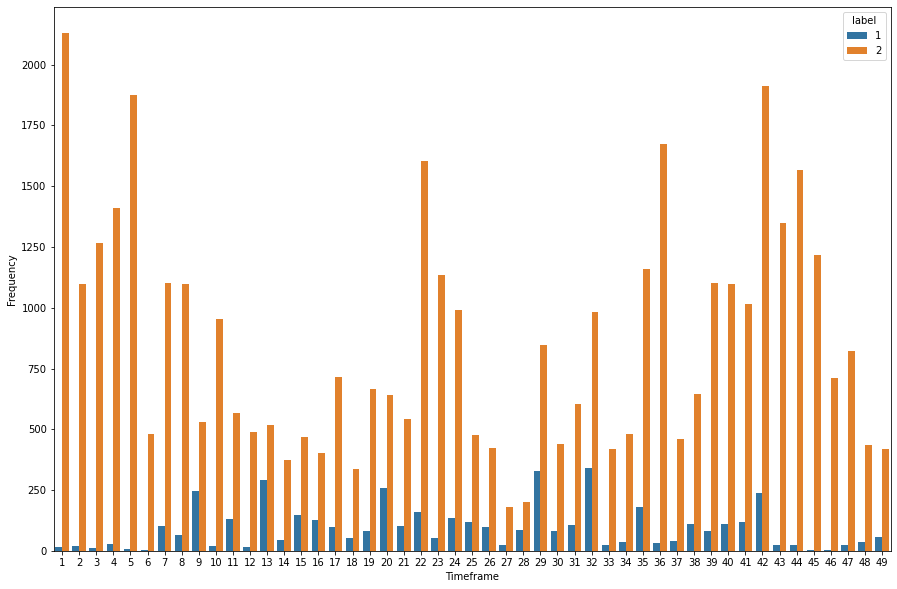

In [ ]:
sns.countplot(data=df_labelled,x=df_labelled.columns[1],hue="label")
plt.xlabel("Timeframe")
plt.ylabel("Frequency")
plt.savefig("Distribution")
plt.show() 

TSNE

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
#d2.insert(100, "100", output, True) 
#print(d2)
df_subset=pd.DataFrame()
d2=df_labelled
y=d2[["label"]]
d2 = d2.drop("label",axis=1)

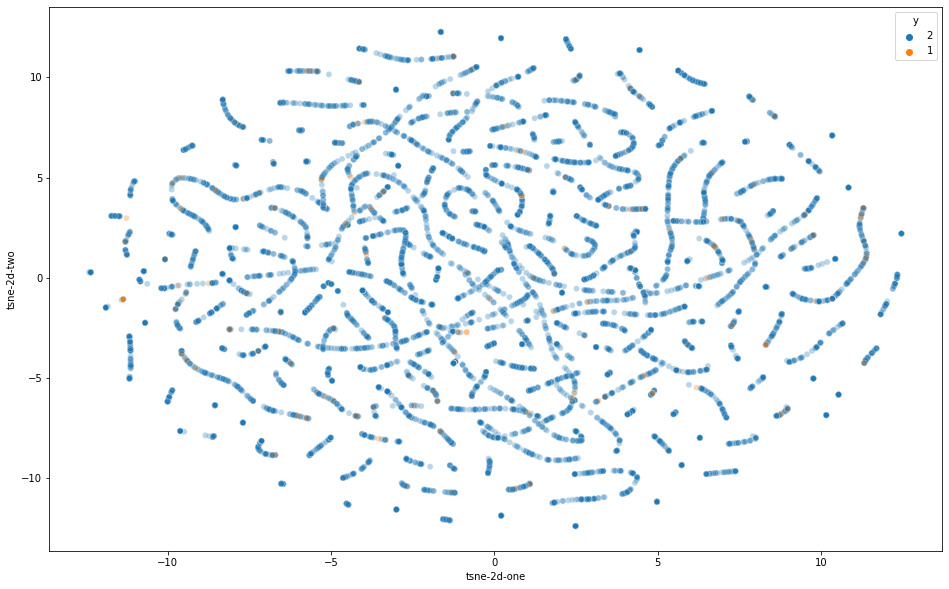

In [ ]:
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_labelled)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset["y"]=y
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    data=df_subset,
    legend="full",
    alpha=0.3
)
plt.savefig("tsne")
plt.show()

PCA

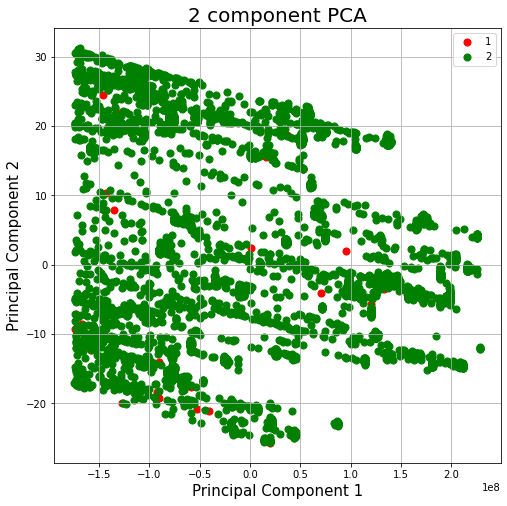

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(d2)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["1","2"]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf.iloc[:,2] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)


ax.grid()
plt.savefig("pca")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(d2, y, test_size=0.5)

Baseline Baseline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[    0  2231]
 [    0 21051]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2231
           2       0.90      1.00      0.95     21051

    accuracy                           0.90     23282
   macro avg       0.45      0.50      0.47     23282
weighted avg       0.82      0.90      0.86     23282



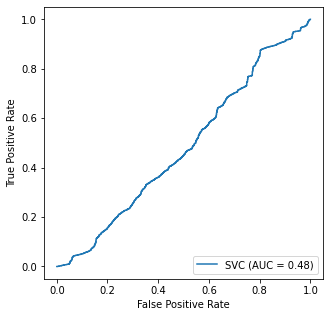

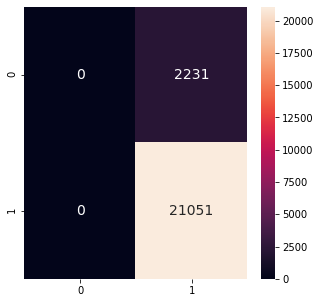

In [ ]:
from sklearn import svm
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
#Create a svm Classifier
clf = svm.SVC(kernel='rbf',C=5)# Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
plt.show()  
roc_auc_score(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')
plt.savefig("rf_heat.png")

Naive Stratified Sampling

In [ ]:
from sklearn.model_selection import train_test_split
df_1=df_labelled.loc[df_labelled['label'] == 1]
y_1 = df_1[["label"]]
df_1=df_1.drop('label',axis=1)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_1, y_1, test_size=0.2)

df_2=df_labelled.loc[df_labelled['label'] == 2]
y_2 = df_2[["label"]]
df_2=df_2.drop("label",axis=1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_2, y_2, test_size=0.9)

In [ ]:
train_trying_x_1 = X_train_1.append(X_train_2)
train_trying_y_1 = y_train_1.append(y_train_2)
test_trying_x_1 = X_test_1.append(X_test_2)
test_trying_y_1 = y_test_1.append(y_test_2)

Baseline with naive stratified sampling

In [ ]:
!pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(train_trying_x_1, test_trying_x_1, train_trying_y_1, test_trying_y_1)
models

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 30/30 [06:15<00:00, 12.53s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.68,0.69,0.69,0.79,5.09
LGBMClassifier,0.69,0.69,0.69,0.80,4.11
RandomForestClassifier,0.68,0.68,0.68,0.79,6.02
AdaBoostClassifier,0.63,0.67,0.67,0.75,5.15
BaggingClassifier,0.63,0.67,0.67,0.75,6.54
ExtraTreesClassifier,0.69,0.67,0.67,0.80,3.88
SVC,0.66,0.65,0.65,0.78,86.91
NuSVC,0.63,0.62,0.62,0.75,84.16
DecisionTreeClassifier,0.64,0.62,0.62,0.76,1.21


Baseline Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[    0   909]
 [    0 37818]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       909
           2       0.98      1.00      0.99     37818

    accuracy                           0.98     38727
   macro avg       0.49      0.50      0.49     38727
weighted avg       0.95      0.98      0.96     38727



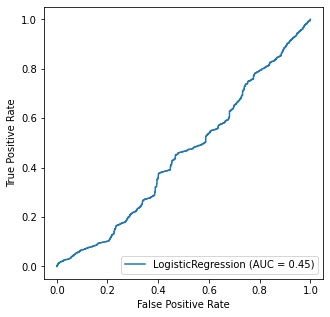

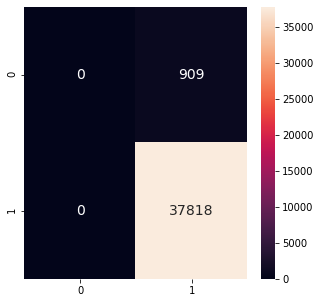

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(train_trying_x_1, train_trying_y_1)
y_pred = clf.predict(test_trying_x_1)
print(confusion_matrix(test_trying_y_1, y_pred))
print(classification_report(test_trying_y_1, y_pred))
metrics.plot_roc_curve(clf, test_trying_x_1, test_trying_y_1)
plt.savefig("roc_log")  # doctest: +SKIP
plt.show()  
roc_auc_score(test_trying_y_1, y_pred) 
sns.heatmap(confusion_matrix(test_trying_y_1, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')
plt.savefig("logistic.png")

SVM

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[  223   686]
 [ 6695 31123]]
              precision    recall  f1-score   support

           1       0.03      0.25      0.06       909
           2       0.98      0.82      0.89     37818

    accuracy                           0.81     38727
   macro avg       0.51      0.53      0.48     38727
weighted avg       0.96      0.81      0.87     38727



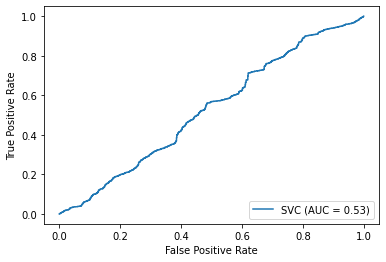

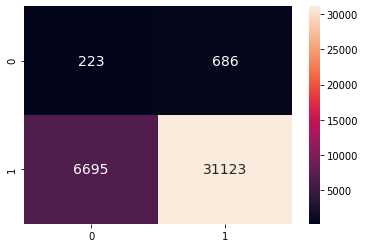

In [ ]:
from sklearn import svm
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
#Create a svm Classifier
clf = svm.SVC(kernel='rbf',C=5)# Linear Kernel

#Train the model using the training sets
clf.fit(train_trying_x_1, train_trying_y_1)

#Predict the response for test dataset
y_pred = clf.predict(test_trying_x_1)
print(confusion_matrix(test_trying_y_1, y_pred))
print(classification_report(test_trying_y_1, y_pred))
metrics.plot_roc_curve(clf, test_trying_x_1, test_trying_y_1)  # doctest: +SKIP
plt.savefig("roc_svc")
plt.show()  
roc_auc_score(test_trying_y_1, y_pred)
sns.heatmap(confusion_matrix(test_trying_y_1, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')
plt.savefig("svc.png")

Random Forest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[  626   283]
 [12442 25376]]
              precision    recall  f1-score   support

           1       0.05      0.69      0.09       909
           2       0.99      0.67      0.80     37818

    accuracy                           0.67     38727
   macro avg       0.52      0.68      0.44     38727
weighted avg       0.97      0.67      0.78     38727



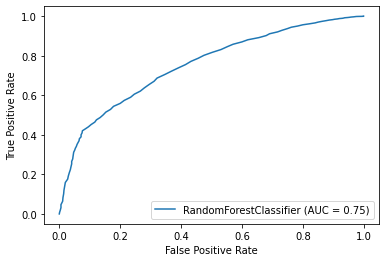

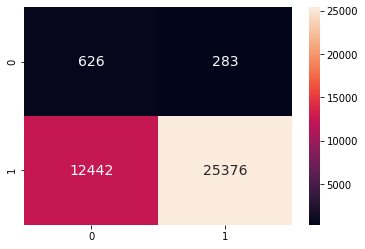

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=1000, random_state=0).fit(train_trying_x_1, train_trying_y_1)
y_pred = clf.predict(test_trying_x_1)
print(confusion_matrix(test_trying_y_1, y_pred))
print(classification_report(test_trying_y_1, y_pred))
metrics.plot_roc_curve(clf, test_trying_x_1, test_trying_y_1)  # doctest: +SKIP
plt.savefig("roc_rf")
plt.show()  
roc_auc_score(test_trying_y_1, y_pred)
sns.heatmap(confusion_matrix(test_trying_y_1, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')
plt.savefig("rf.png")

In [ ]:
type(test_trying_x_1)

pandas.core.frame.DataFrame

Kfold for random forest and SVM

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[[  202   707]
 [ 6264 31554]]
              precision    recall  f1-score   support

           1       0.03      0.22      0.05       909
           2       0.98      0.83      0.90     37818

    accuracy                           0.82     38727
   macro avg       0.50      0.53      0.48     38727
weighted avg       0.96      0.82      0.88     38727



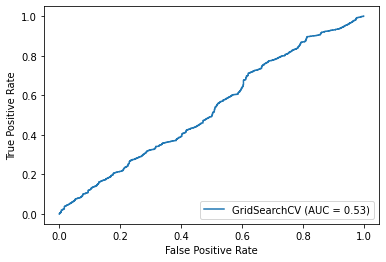

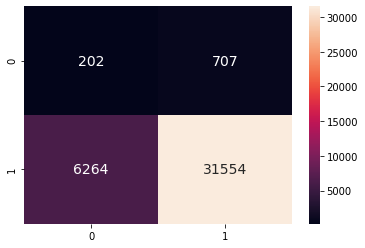

0.528293405256756

In [ ]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.1,1,5,10],  
              'gamma': [1, 0.1, 0.01,"scale"], 
              'kernel': ['rbf']}  

train_trying_y_1=train_trying_y_1
test_trying_y_1 = test_trying_y_1
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 0,scoring="f1",cv=10) 
  
# fitting the model for grid search 
grid.fit(train_trying_x_1, train_trying_y_1) 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
y_pred = grid.predict(test_trying_x_1)
print(confusion_matrix(test_trying_y_1, y_pred))
print(classification_report(test_trying_y_1, y_pred))
metrics.plot_roc_curve(grid, test_trying_x_1, test_trying_y_1)  # doctest: +SKIP
plt.savefig("svm_grid.png")
plt.show()
sns.heatmap(confusion_matrix(test_trying_y_1, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')
plt.savefig("svm_heat_grid.png")

plt.show()
roc_auc_score(test_trying_y_1, y_pred) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

{'max_depth': 10, 'max_features': 100, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=100,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[  673   236]
 [13282 24536]]
              precision    recall  f1-score   support

           1       0.05      0.74      0.09       909
           2       0.99      0.65      0.78     37818

    accuracy                           0.65     38727
   macro avg       0.52      0.69      0.44     38727
weighted avg       0.97      0.65      0.77     38727



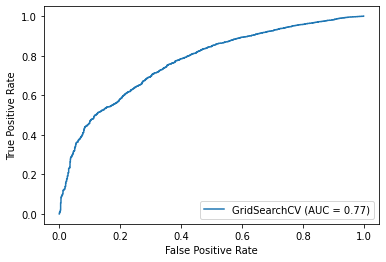

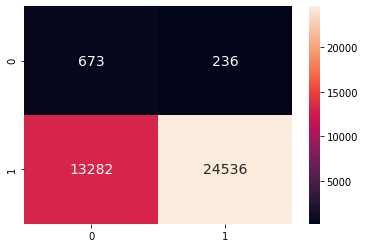

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = [
{'n_estimators': [10, 25,50,100], 'max_features': [5, 10,15,20,100], 
 'max_depth': [10,100,None]}
]

train_trying_y_1=train_trying_y_1
test_trying_y_1 = test_trying_y_1
forest = RandomForestClassifier()
h_forest = GridSearchCV(forest, param_grid, cv=5, scoring='f1',verbose=0)
h_forest.fit(train_trying_x_1, train_trying_y_1)
print(h_forest.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(h_forest.best_estimator_) 
y_pred = h_forest.predict(test_trying_x_1)
print(confusion_matrix(test_trying_y_1, y_pred))
print(classification_report(test_trying_y_1, y_pred))
metrics.plot_roc_curve(h_forest, test_trying_x_1, test_trying_y_1)  # doctest: +SKIP
plt.savefig("rf_grid.png")
plt.show()
sns.heatmap(confusion_matrix(test_trying_y_1, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')
plt.savefig("rf_heat_grid.png")


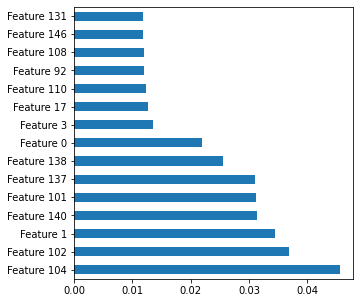

In [ ]:
feat_importances = pd.Series(clf.feature_importances_, index=df_1.columns)
feat_importances.nlargest(15).plot(kind='barh')
#plt.saveplot("featureimp")

**Preprocessing**

In [ ]:
print(y)
d2

       label
3          2
9          2
10         2
11         2
16         2
...      ...
203752     2
203754     2
203759     1
203763     2
203766     1

[46564 rows x 1 columns]


,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,...,Feature 127,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
3,230460314.0,1.0,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,0.935886,-0.098695,1.203038,0.988902,0.341693,-0.013282,-0.057392,0.058329,-0.032930,-0.042709,0.065455,0.324947,-0.139732,-0.148854,-0.080105,-0.155638,1.313051,1.106965,-0.139734,-0.148850,-0.080104,-0.155638,1.313130,1.106995,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.077909,-0.093120,1.587690,1.586539,-0.101820,0.704558,0.448898,0.659662,0.311091,0.302198,-1.373962,-1.355393,-0.300941,-1.404583,0.064846,-0.035232,-0.168742,-0.442156,-0.416540,-0.418273,0.367605,0.392035,-0.968903,-1.943850,-1.059868,-1.678997,0.185597,0.185492,-0.169472,-0.470592,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
9,232344069.0,1.0,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,-0.049707,-0.140266,-0.028741,-0.035391,-0.042955,-0.013282,-0.006754,-0.148916,-0.151494,-0.146513,0.887058,0.884557,-0.139721,-0.148905,-0.080147,-0.155653,-0.010763,-0.012107,-0.139723,-0.148901,-0.080147,-0.155653,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.097719,-0.127462,0.003143,0.002426,-0.115680,-0.190199,-0.177836,-0.201578,1.064205,1.063787,-1.373932,-1.356183,-0.301411,-1.404577,-0.975738,-0.975237,-0.168742,-0.445357,-0.409015,-0.427594,-1.015963,-1.016230,-0.968903,-1.943850,-1.059868,-1.678997,0.185597,0.185492,-0.216814,-0.617907,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
10,27553029.0,1.0,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,-0.049707,-0.143847,-0.028741,-0.035391,-0.042955,-0.013282,-0.038424,-0.150266,-0.150457,-0.150661,0.887058,0.884557,-0.139722,-0.148906,-0.080147,-0.155654,-0.010763,-0.012107,-0.139724,-0.148902,-0.080147,-0.155654,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.097719,-0.127462,0.003143,0.002426,-0.107516,-0.190820,-0.180486,-0.200607,1.064205,1.063787,-1.373902,-1.348835,-0.282308,-1.400475,-0.975738,-0.975237,-0.168742,-0.454961,-0.420758,-0.436915,-1.015963,-1.016230,-0.968903,-1.943850,-1.059868,-1.678997,0.185597,0.185492,-0.216814,-0.587217,-0.539735,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
11,36411953.0,1.0,-0.172621,-0.162277,0.463609,-0.046932,-0.043875,-0.029140,-0.061584,-0.163512,-0.169227,-0.048778,-0.165764,2.459222,2.415325,-0.042955,-0.013282,-0.056091,-0.170872,-0.172695,-0.175836,0.887058,0.884557,-0.139732,-0.148912,-0.080147,-0.155662,2.679386,2.665377,-0.139734,-0.148908,-0.080147,-0.155662,2.679448,2.665308,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.095439,-0.124412,-3.872194,-3.871849,-0.124473,-0.182729,-0.166347,-0.194807,1.064205,1.063787,-1.373872,-1.349151,-0.283202,-1.400636,1.342003,1.340733,-0.159807,-0.451549,-0.419971,-0.430916,1.301966,1.301281,0.660117,0.146997,-0.453330,0.445895,1.488113,1.487932,-0.193143,-0.544250,-0.494897,-0.531617,1.461330,1.461369,0.018279,-0.087490,

In [ ]:
std = StandardScaler()
X_preprocessed = std.fit_transform(d2)
scaled_features_df = pd.DataFrame(X_preprocessed, index=d2.index, columns=d2.columns)

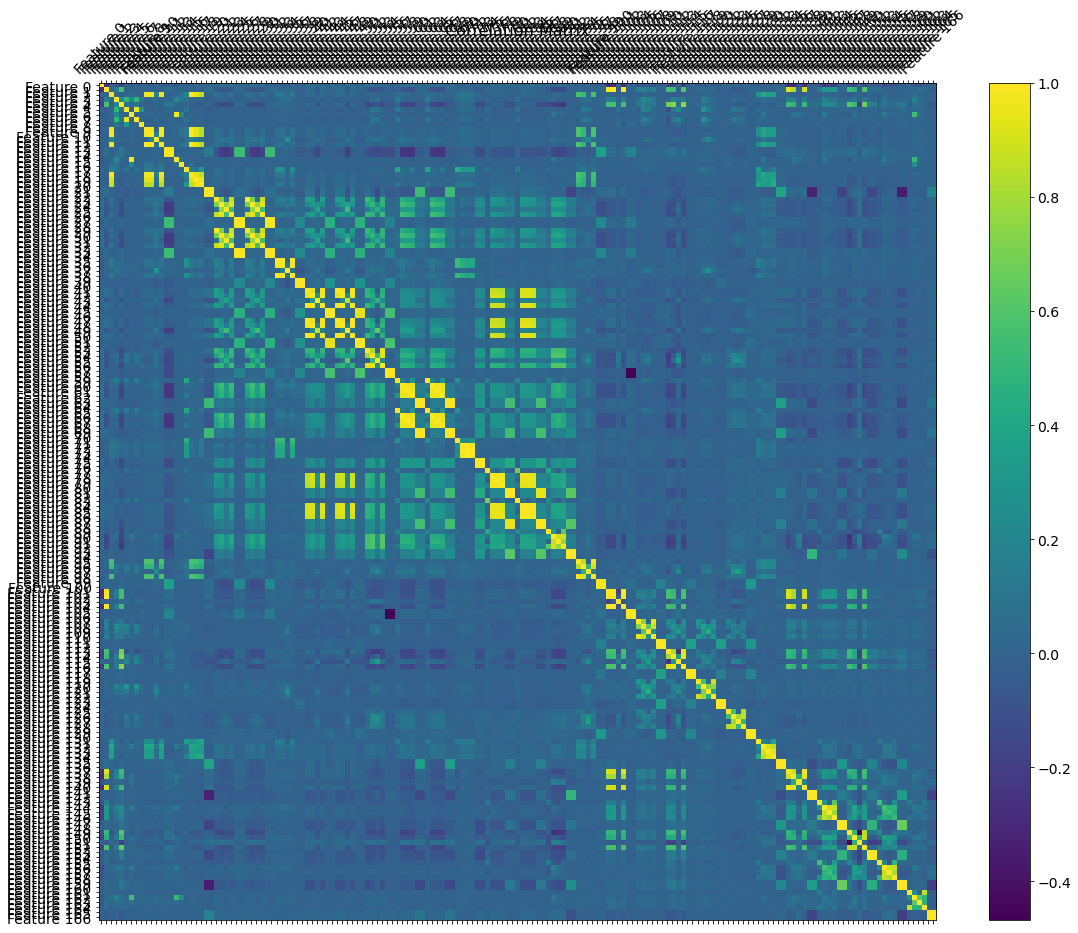

In [ ]:
corr = scaled_features_df.corr()
f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(scaled_features_df.shape[1]), scaled_features_df.columns, fontsize=14, rotation=45)
plt.yticks(range(scaled_features_df.shape[1]), scaled_features_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig("Correlation plot")

In [ ]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [ ]:
print(to_drop)

['Feature 7', 'Feature 9', 'Feature 10', 'Feature 12', 'Feature 14', 'Feature 15', 'Feature 18', 'Feature 20', 'Feature 22', 'Feature 28', 'Feature 29', 'Feature 30', 'Feature 31', 'Feature 32', 'Feature 33', 'Feature 34', 'Feature 36', 'Feature 38', 'Feature 40', 'Feature 44', 'Feature 46', 'Feature 47', 'Feature 48', 'Feature 50', 'Feature 51', 'Feature 52', 'Feature 56', 'Feature 58', 'Feature 61', 'Feature 62', 'Feature 64', 'Feature 65', 'Feature 66', 'Feature 67', 'Feature 68', 'Feature 69', 'Feature 70', 'Feature 73', 'Feature 74', 'Feature 76', 'Feature 79', 'Feature 80', 'Feature 82', 'Feature 84', 'Feature 85', 'Feature 86', 'Feature 87', 'Feature 88', 'Feature 94', 'Feature 98', 'Feature 100', 'Feature 101', 'Feature 102', 'Feature 104', 'Feature 106', 'Feature 112', 'Feature 118', 'Feature 124', 'Feature 130', 'Feature 136', 'Feature 140', 'Feature 142', 'Feature 148', 'Feature 154', 'Feature 160', 'Feature 166']


In [ ]:
df_preprocessed = scaled_features_df.drop(scaled_features_df[to_drop], axis=1)

In [ ]:
df_preprocessed

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 8,Feature 11,Feature 13,Feature 16,Feature 17,Feature 19,Feature 21,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 35,Feature 37,Feature 39,Feature 41,Feature 42,Feature 43,Feature 45,Feature 49,Feature 53,Feature 54,Feature 55,Feature 57,Feature 59,Feature 60,Feature 63,Feature 71,Feature 72,Feature 75,Feature 77,Feature 78,Feature 81,...,Feature 117,Feature 119,Feature 120,Feature 121,Feature 122,Feature 123,Feature 125,Feature 126,Feature 127,Feature 128,Feature 129,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 137,Feature 138,Feature 139,Feature 141,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165
3,0.507434,-1.556891,1.039406,-0.094750,-1.237428,1.180977,0.331838,-0.063978,0.730615,1.154638,-0.01389,-0.051050,-0.004356,0.110909,-0.178618,-0.190409,-0.104850,-0.198894,1.228876,-0.02782,-0.036067,-0.001994,-0.267258,-0.286594,-0.104956,-0.748158,-0.127030,-0.454110,-0.546019,-0.261981,0.484117,-0.042255,-0.212842,0.101699,-0.015368,-0.033313,-0.336122,-0.099799,-0.310749,-0.851826,...,-0.010984,-0.027540,1.015759,0.893121,1.249580,1.643522,-0.095947,-0.132083,-0.092586,-0.106223,1.445587,-0.109968,0.570222,0.354517,0.558706,0.338487,-1.437979,-1.406650,-0.297890,0.038629,-0.175715,-0.451517,-0.426018,-0.428058,0.369748,-0.998960,-1.973883,-1.049029,-1.708667,0.17340,-0.181895,-0.465227,-0.504164,-0.394411,0.501128,0.004393,0.294338,0.378830,1.015211,0.190785
9,0.524453,-1.556891,-0.127958,-0.196150,-1.237428,-0.135776,-0.050486,-0.063978,-0.059210,0.021189,-0.01389,-0.011805,-0.134422,0.928817,-0.178610,-0.190447,-0.104882,-0.198905,0.021822,-0.02782,-0.036067,-0.001994,-0.267258,-0.286602,-0.104968,0.045714,-0.127048,-0.454041,-0.546906,-0.263087,0.027443,-0.042222,-0.212872,-1.314363,-0.015368,-0.033334,-0.171494,-0.099799,-0.310742,-1.487997,...,-0.010984,-0.121412,-0.180317,-0.135093,-0.158589,-0.028626,-0.095947,-0.155647,-0.109130,-0.137008,0.018086,-0.126236,-0.170830,-0.155673,-0.178348,1.095030,-1.437949,-1.407452,-0.298392,-1.005738,-0.175715,-0.454560,-0.418711,-0.436942,-1.026672,-0.998960,-1.973883,-1.049029,-1.708667,0.17340,-0.228761,-0.615084,-0.571432,-0.610410,0.223219,0.004393,-0.107978,-0.161776,-0.087232,-0.109153
10,-1.325700,-1.556891,-0.131487,-0.196150,-1.237428,-0.135776,-0.050486,-0.063978,-0.059210,0.021189,-0.01389,-0.036349,-0.133284,0.928817,-0.178611,-0.190447,-0.104882,-0.198906,0.021822,-0.02782,-0.036067,-0.001994,-0.267258,-0.286602,-0.104968,0.045714,-0.127048,-0.454084,-0.546943,-0.263087,0.027443,-0.042224,-0.212872,-1.314363,-0.015368,-0.033334,-2.400564,-0.099799,-0.310227,-1.487997,...,-0.010984,-0.121412,-0.180317,-0.135093,-0.158589,-0.028626,-0.095947,-0.155647,-0.109130,-0.137008,0.018086,-0.116653,-0.171345,-0.157830,-0.177517,1.095030,-1.437919,-1.399996,-0.277977,-1.005738,-0.175715,-0.463692,-0.430113,-0.445827,-1.026672,-0.998960,-1.973883,-1.049029,-1.708667,0.17340,-0.228761,-0.583864,-0.532899,-0.578457,-1.004853,0.004393,-0.107978,-0.161776,-0.087232,-0.109153
11,-1.245665,-1.556891,-0.152898,-0.174222,0.417262,-0.058320,-0.050486,-0.063978,-0.058466,2.310544,-0.01389,-0.050042,-0.157679,0.928817,-0.178618,-0.190452,-0.104882,-0.198912,2.474699,-0.02782,-0.036067,-0.001994,-0.267258,-0.286602,-0.104968,0.045714,-0.127048,-0.454084,-0.546884,-0.262959,2.624728,-0.042255,-0.212879,0.934474,-0.015368,-0.033334,-0.171494,-0.099799,-0.310670,1.145632,...,3.408808,-0.121412,-0.076311,0.083669,-0.074658,-3.057837,-0.093757,-0.153166,-0.107226,-0.134274,-3.473162,-0.136557,-0.164644,-0.146320,-0.172554,1.095030,-1.437888,-1.400317,-0.278932,1.320431,-0.167392,-0.460448,-0.429350,-0.440108,1.312789,0.613346,0.118055,-0.438349,0.402454,1.48287,-0.205328,-0.540155,-0.486660,-0.5

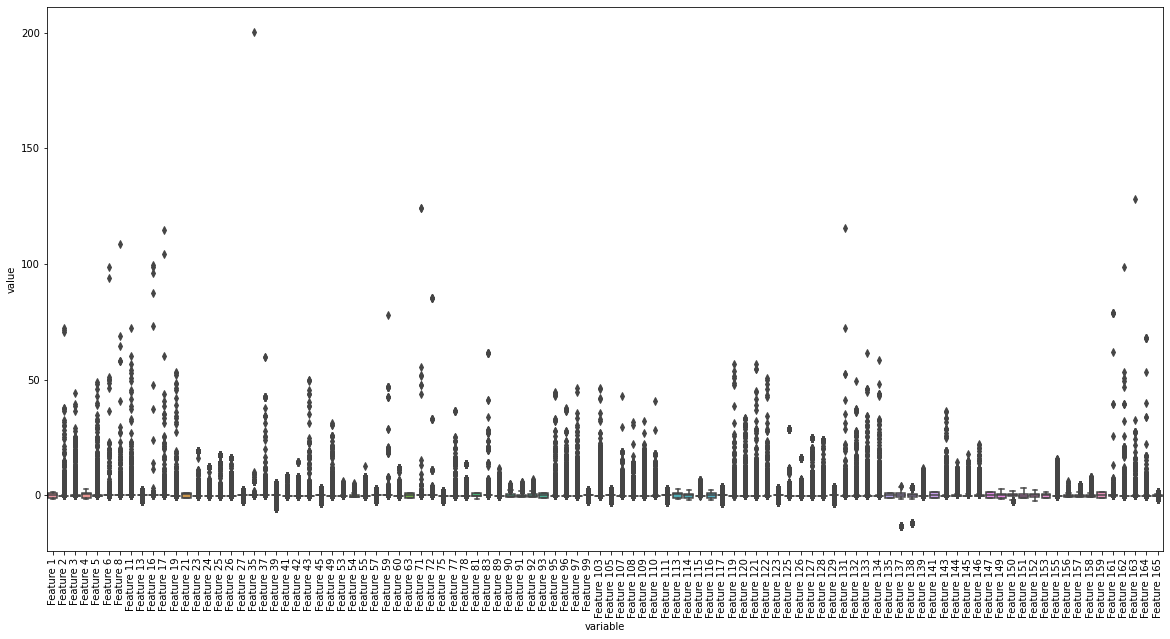

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
#df_temp=df_features.drop("label",axis=1)
df_temp=df_preprocessed.drop("Feature 0",axis=1)
plt.xticks(rotation=90)
sns.boxplot(data=pd.melt(df_temp),x="variable", y="value")
plt.savefig("Updated Boxplot")

In [ ]:
from sklearn.model_selection import train_test_split
df_labelled = pd.concat([df_preprocessed, y], axis=1)
df_1=df_labelled.loc[df_labelled['label'] == "1"]
y_1 = df_1[["label"]]
df_1=df_1.drop('label',axis=1)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_1, y_1, test_size=0.2)

df_2=df_labelled.loc[df_labelled['label'] == "2"]
y_2 = df_2[["label"]]
df_2=df_2.drop("label",axis=1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_2, y_2, test_size=0.9)

train_trying_x_1 = X_train_1.append(X_train_2)
train_trying_y_1 = y_train_1.append(y_train_2)
test_trying_x_1 = X_test_1.append(X_test_2)
test_trying_y_1 = y_test_1.append(y_test_2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[  546   363]
 [12699 25119]]
              precision    recall  f1-score   support

           1       0.04      0.60      0.08       909
           2       0.99      0.66      0.79     37818

    accuracy                           0.66     38727
   macro avg       0.51      0.63      0.44     38727
weighted avg       0.96      0.66      0.78     38727



<Figure size 504x504 with 0 Axes>

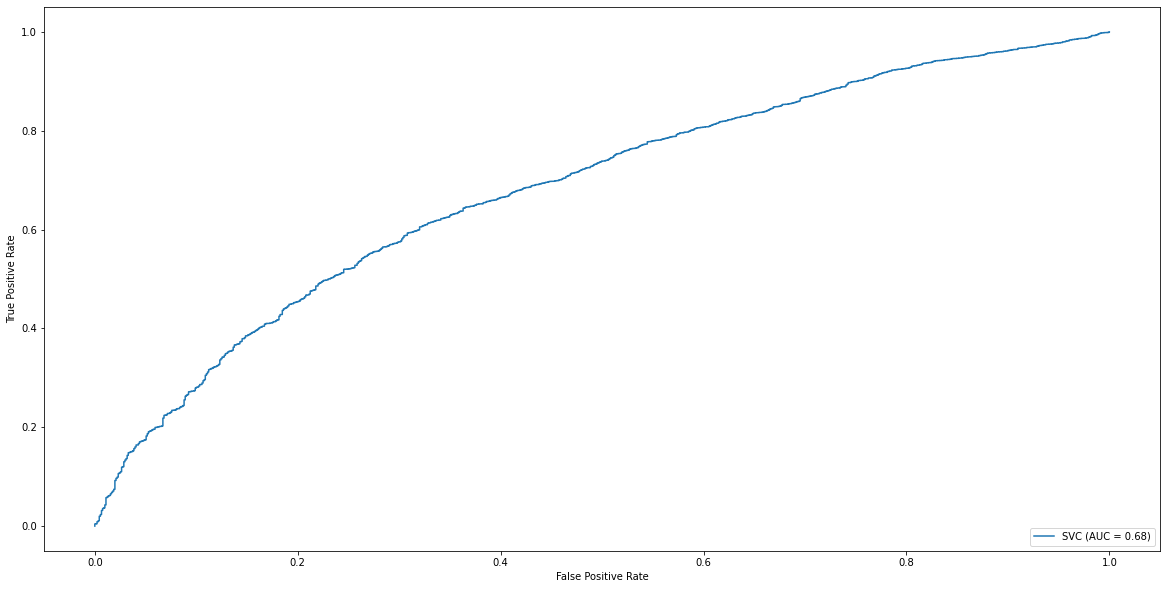

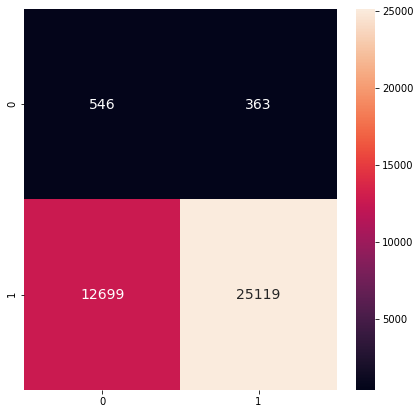

In [ ]:
from sklearn.svm import SVC
clf = SVC().fit(train_trying_x_1, train_trying_y_1)
plt.figure(figsize=(7,7))
y_pred = clf.predict(test_trying_x_1)
print(confusion_matrix(test_trying_y_1, y_pred))
print(classification_report(test_trying_y_1, y_pred))
metrics.plot_roc_curve(clf, test_trying_x_1, test_trying_y_1)  # doctest: +SKIP
plt.savefig("roc_rf2.png")
plt.show()  
plt.figure(figsize=(7,7))
roc_auc_score(test_trying_y_1, y_pred)
sns.heatmap(confusion_matrix(test_trying_y_1, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')
plt.savefig("rf2.png")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mlq5.csv to mlq5.csv


   Outlook_Overcast  Outlook_Rain  ...  Wind_Strong  Wind_Weak
0                 0             0  ...            0          1
1                 0             0  ...            1          0
2                 1             0  ...            0          1
3                 0             1  ...            0          1
4                 0             1  ...            0          1

[5 rows x 11 columns]
0.6666666666666666
1.0


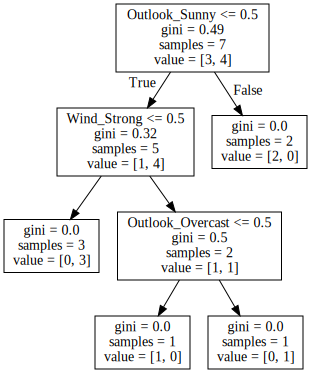

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn import tree


df = pd.read_csv("mlq5.csv")



# from sklearn.preprocessing import LabelEncoder
# Le = LabelEncoder()

# df['Outlook'] = Le.fit_transform(df['Outlook'])
# df['Climate'] = Le.fit_transform(df['Climate'])
# df['Humidity'] = Le.fit_transform(df['Humidity'])
# df['Wind'] = Le.fit_transform(df['Wind'])
# df['PlayMatch'] = Le.fit_transform(df['PlayMatch'])

y = df['PlayMatch']
df = df.drop(['PlayMatch'], axis=1)
df = pd.get_dummies(df)

X_train = df.iloc[:7,:]
X_test = df.iloc[8:,:]

y_train = y.iloc[:7]
y_test = y.iloc[8:]

print(X_train.head())

clf = DecisionTreeClassifier(random_state=1234)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(accuracy_score(clf.predict(X_train), y_train))

import graphviz 
dot_data = tree.export_graphviz(clf, feature_names=df.columns ,out_file=None) 
graph = graphviz.Source(dot_data) 

graph
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf, 
#                    feature_names=X.columns,  
#                    class_names=y.columns,
#                    filled=True)


# print(df[(df['Outlook']!="Overcast") & (df['PlayMatch']=="No")].shape[0])

# print(df[((df['Outlook']!="Rainy") & (df['Outlook']!="Sunny")) & (df['PlayMatch']=="No")].shape[0])

Installing Deepwalk

In [ ]:
!git clone https://github.com/phanein/deepwalk.git

fatal: destination path 'deepwalk' already exists and is not an empty directory.


In [ ]:
os.chdir('/content/gdrive/My Drive/Bitcoin/deepwalk/') 
!pip install -r requirements.txt
!python setup.py install

running install
running bdist_egg
running egg_info
writing deepwalk.egg-info/PKG-INFO
writing dependency_links to deepwalk.egg-info/dependency_links.txt
writing entry points to deepwalk.egg-info/entry_points.txt
writing requirements to deepwalk.egg-info/requires.txt
writing top-level names to deepwalk.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'deepwalk.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/deepwalk
copying build/lib/deepwalk/walks.py -> build/bdist.linux-x86_64/egg/deepwalk
copying build/lib/deepwalk/__init__.py -> build/bdist.linux-x86_64/egg/deepwalk
copying build/lib/deepwalk/skipgram.py -> build/bdist.linux-x86_64/egg/deepwalk
copying build/lib/deepwalk/__main__.py -> build/bdist.linux-x86_64/egg/deepwalk
copying build/lib/deepwalk/graph.py -> build/bdist.linux-x86_64/egg/deepwalk
byte-com

Running deepwalk on edgelist

In [ ]:
os.chdir('/content/gdrive/My Drive/Bitcoin/')
!deepwalk --input new_edgelist --format edgelist --output abc

Number of nodes: 203770
Number of walks: 2037700
Data size (walks*length): 81508000
Walking...
Training...
Traceback (most recent call last):
  File "/usr/local/bin/deepwalk", line 33, in <module>
    sys.exit(load_entry_point('deepwalk==1.0.3', 'console_scripts', 'deepwalk')())
  File "/usr/local/lib/python3.6/dist-packages/deepwalk-1.0.3-py3.6.egg/deepwalk/__main__.py", line 162, in main
    process(args)
  File "/usr/local/lib/python3.6/dist-packages/deepwalk-1.0.3-py3.6.egg/deepwalk/__main__.py", line 75, in process
    model = Word2Vec(walks, size=args.representation_size, window=args.window_size, min_count=0, sg=1, hs=1, workers=args.workers)
  File "/usr/local/lib/python3.6/dist-packages/gensim/models/word2vec.py", line 767, in __init__
    fast_version=FAST_VERSION)
  File "/usr/local/lib/python3.6/dist-packages/gensim/models/base_any2vec.py", line 763, in __init__
    end_alpha=self.min_alpha, compute_loss=compute_loss)
  File "/usr/local/lib/python3.6/dist-packages/gensim/mod

Seperating node and features

In [ ]:
with open("abc") as fp:
  fp=fp.read().splitlines()
t={x[:x.index(" ")]:x[x.index(" ")+1:] for x in fp[1:]}

In [ ]:
fp[1]

'2984918 -0.10098697 -0.08392663 0.22602674 -0.51018703 0.21109855 -0.4086857 -1.1646547 0.48790392 0.52686906 0.18431653 0.13806067 -0.32942536 -0.30717626 0.01324932 0.265662 -0.112288095 -0.19282806 -0.27312103 0.37111098 0.37188762 0.22482285 -0.2372683 -0.11440277 -0.11778817 0.2302557 -0.12649493 0.27137583 -0.09746857 -0.16711599 0.002754395 -0.12352224 0.42968124 -0.75511044 0.38155392 -0.1790566 -0.105966486 0.3485417 -0.44859102 -0.32027653 -0.13839643 -0.19193354 0.25471225 -0.48596463 -0.018223455 0.1273383 -0.65112966 -0.069094226 0.2532722 -0.37600428 -0.122515395 0.38626733 0.14856048 -0.31267592 0.26631063 -0.30337173 -0.41668302 0.22596142 0.1633309 0.29577267 -0.118717596 -0.010452719 -0.103425324 0.13912027 0.20169447'

In [ ]:
t

{'2984918': '-0.10098697 -0.08392663 0.22602674 -0.51018703 0.21109855 -0.4086857 -1.1646547 0.48790392 0.52686906 0.18431653 0.13806067 -0.32942536 -0.30717626 0.01324932 0.265662 -0.112288095 -0.19282806 -0.27312103 0.37111098 0.37188762 0.22482285 -0.2372683 -0.11440277 -0.11778817 0.2302557 -0.12649493 0.27137583 -0.09746857 -0.16711599 0.002754395 -0.12352224 0.42968124 -0.75511044 0.38155392 -0.1790566 -0.105966486 0.3485417 -0.44859102 -0.32027653 -0.13839643 -0.19193354 0.25471225 -0.48596463 -0.018223455 0.1273383 -0.65112966 -0.069094226 0.2532722 -0.37600428 -0.122515395 0.38626733 0.14856048 -0.31267592 0.26631063 -0.30337173 -0.41668302 0.22596142 0.1633309 0.29577267 -0.118717596 -0.010452719 -0.103425324 0.13912027 0.20169447',
 '89273': '-0.6028774 -0.15254629 0.13006312 0.24477324 0.020465596 0.37398043 -0.29614457 0.14027172 0.35391274 0.24676245 0.02159821 -0.3209589 -0.15573685 -0.23325118 -0.10994798 -0.06037229 -0.30854845 -0.34088814 0.14430131 0.21303421 0.49822

matching node id with labelled data

In [ ]:
x=[]
y=[]
for i in t:
  if len(df_classes[df_classes["txId"]==int(i)])!=0:
    #for j in df_labelled[df_labelled.columns[0]]:
    x.append(t[i])
    y.append(df_classes[df_classes["txId"]==int(i)]["class"])
    #print("dvvxxxads")

Naive Stratifies Sampling and converting embedding string to list of floats

In [ ]:
tx_1=[]
ty_1=[]
tx_2=[]
ty_2=[]
for n,i in enumerate(y):
  if i.values[0]=="1":
    ttttt=[]
    for k in x[n].split(" "):
      ttttt.append(float(k))
    tx_1.append(np.array(ttttt))
    ty_1.append([int(i.values[0])])
  elif i.values[0]=="2":
    ttttt=[]
    for k in x[n].split(" "):
      ttttt.append(float(k))
    tx_2.append(np.array(ttttt))
    ty_2.append([int(i.values[0])])

In [ ]:
len(tx_2),len(df_labelled)

(42019, 46564)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(tx_1, ty_1, test_size=0.2)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(tx_2, ty_2, test_size=0.9)


In [ ]:

train_trying_x_1 =[]
train_trying_y_1 =[]
test_trying_x_1  = []
test_trying_y_1  = [] 

for i in X_train_1:
  train_trying_x_1.append(i)
for i in X_train_2:
  train_trying_x_1.append(i)
for i in X_test_1:
  test_trying_x_1.append(i)
for i in X_test_2:
  test_trying_x_1.append(i)

for i in y_train_1:
  train_trying_y_1.append(i)
for i in y_train_2:
  train_trying_y_1.append(i)
for i in y_test_1:
  test_trying_y_1.append(i)
for i in y_test_2:
  test_trying_y_1.append(i)

In [ ]:
X_train_1[0]

In [ ]:
np.array(y_train_1).shape,np.array(X_train_1).shape

((3636, 1), (3636, 64))

Random Forest, SVM and their KFold versions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[  670   239]
 [ 4530 33288]]
              precision    recall  f1-score   support

           1       0.13      0.74      0.22       909
           2       0.99      0.88      0.93     37818

    accuracy                           0.88     38727
   macro avg       0.56      0.81      0.58     38727
weighted avg       0.97      0.88      0.92     38727



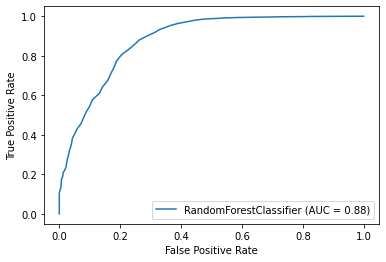

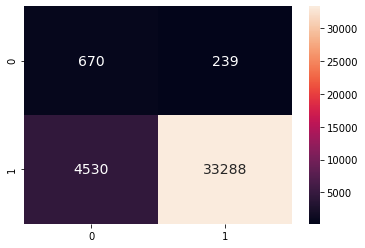

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=1000, random_state=0).fit(train_trying_x_1, train_trying_y_1)
y_pred = clf.predict(test_trying_x_1)
print(confusion_matrix(test_trying_y_1, y_pred))
print(classification_report(test_trying_y_1, y_pred))
metrics.plot_roc_curve(clf, test_trying_x_1, test_trying_y_1)  # doctest: +SKIP
plt.savefig("roc_rf_dw")
plt.show()  
roc_auc_score(test_trying_y_1, y_pred)
sns.heatmap(confusion_matrix(test_trying_y_1, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')
plt.savefig("rf_dw.png")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[[  664   245]
 [ 1709 36109]]
              precision    recall  f1-score   support

           1       0.28      0.73      0.40       909
           2       0.99      0.95      0.97     37818

    accuracy                           0.95     38727
   macro avg       0.64      0.84      0.69     38727
weighted avg       0.98      0.95      0.96     38727



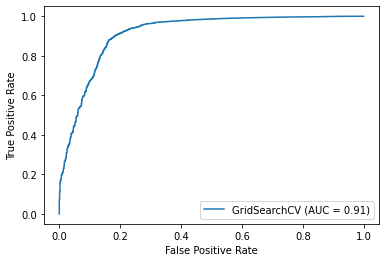

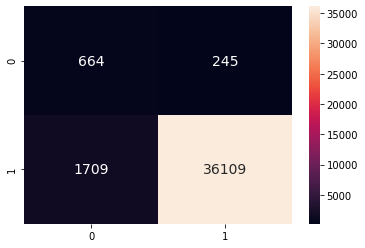

0.8426414630991895

In [ ]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.001,0.01,0.1,1,5,10,100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,10,20,"scale"], 
              'kernel': ['rbf']}  

train_trying_y_1=train_trying_y_1
test_trying_y_1 = test_trying_y_1
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 0,scoring="f1",cv=10) 
  
# fitting the model for grid search 
grid.fit(train_trying_x_1, train_trying_y_1) 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
y_pred = grid.predict(test_trying_x_1)
print(confusion_matrix(test_trying_y_1, y_pred))
print(classification_report(test_trying_y_1, y_pred))
metrics.plot_roc_curve(grid, test_trying_x_1, test_trying_y_1)  # doctest: +SKIP
plt.savefig("svm_grid_dw.png")
plt.show()
sns.heatmap(confusion_matrix(test_trying_y_1, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')
plt.savefig("svm_heat_grid_dw.png")

plt.show()
roc_auc_score(test_trying_y_1, y_pred) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

{'max_depth': None, 'max_features': 20, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[  684   225]
 [ 4975 32843]]
              precision    recall  f1-score   support

           1       0.12      0.75      0.21       909
           2       0.99      0.87      0.93     37818

    accuracy                           0.87     38727
   macro avg       0.56      0.81      0.57     38727
weighted avg       0.97      0.87      0.91     38727



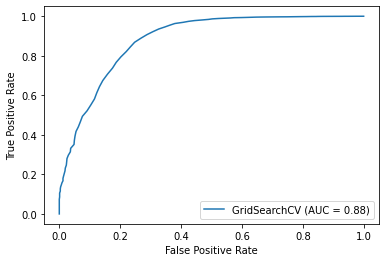

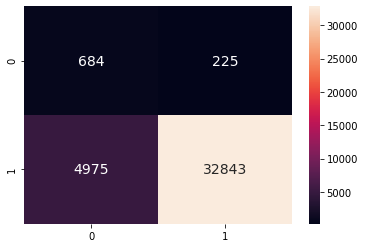

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = [
{'n_estimators': [10, 25,50,100], 'max_features': [5, 10,15,20,100], 
 'max_depth': [10,100,None]}
]

train_trying_y_1=train_trying_y_1
test_trying_y_1 = test_trying_y_1
forest = RandomForestClassifier()
h_forest = GridSearchCV(forest, param_grid, cv=5, scoring='f1',verbose=0)
h_forest.fit(train_trying_x_1, train_trying_y_1)
print(h_forest.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(h_forest.best_estimator_) 
y_pred = h_forest.predict(test_trying_x_1)
print(confusion_matrix(test_trying_y_1, y_pred))
print(classification_report(test_trying_y_1, y_pred))
metrics.plot_roc_curve(h_forest, test_trying_x_1, test_trying_y_1)  # doctest: +SKIP
plt.savefig("rf_grid_dw.png")
plt.show()
sns.heatmap(confusion_matrix(test_trying_y_1, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')
plt.savefig("rf_heat_grid_dw.png")
